# Hoja de trabajo 5, colas
### Carlos Villagrán, 22264

## Simulación 1:
<ul>
<li>RAM: 100</li>
<li>Velocidad CPU: 3</li>
<li>Cantidad de CPUs: 1</li>
</ul>

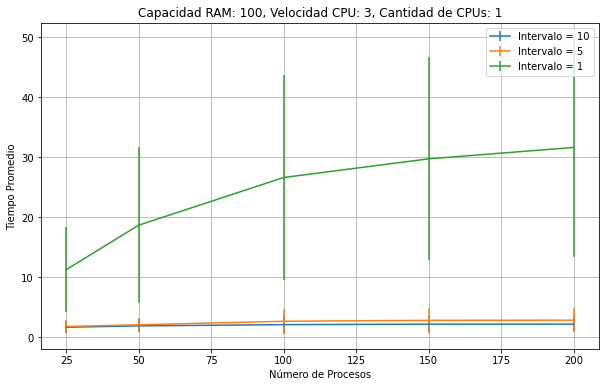

In [30]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

#Se definen las constantes del sistema
SEMILLA_ALEATORIA = 42
NUM_PROCESOS = [25, 50, 100, 150, 200]
INTERVALOS = [10, 5, 1]
CAPACIDAD_RAM = 100  
velocidad_cpu = 3

class Simulacion:
    #Se inicializa la clase con su constructor utilizando las variables necesarias para caracterizar la simulacion
    #env, ambiente de simulacion de SimPY
    #num_procesos, cantidad de procesos a simular
    #intervalo, tiempo esperado para la llegada de cada proceso
    #capacidad_ram, maximo espacio de almacenamiento en la RAM
    #velocidad_ram, cantidad de operaciones por ejecucion
    #tiempos_proceso, almacena el tiempo de ejecucion para cada proceso para luego poder sacar la media y desviacion estandar
    def __init__(self, env, num_procesos, intervalo, capacidad_ram, velocidad_cpu):
        self.env = env
        self.RAM = simpy.Container(env, init=capacidad_ram, capacity=capacidad_ram)
        self.CPU = simpy.Resource(env, capacity=1)
        self.num_procesos = num_procesos
        self.intervalo = intervalo
        self.velocidad_cpu = velocidad_cpu
        self.tiempos_proceso = []
        
    #Metodo que simula el comportamiento de un proceso. Al correr el metodo se generan procesos con requerimientos
    #aleatorios. Dentro de esta funcion se incluye el 
    def proceso(self, nombre):
        #Etapa de ciclo: new, se genera el proceso
        memoria_requerida = random.randint(1, 10)  # Requerimiento de memoria aleatorio para cada proceso
        
        with self.RAM.get(memoria_requerida) as req:
            #Etapa de ciclo: ready
            yield req
            tiempo_inicio = self.env.now
            instrucciones_restantes = random.randint(1, 10)  # Instrucciones aleatorias para cada proceso
            while instrucciones_restantes > 0:
                
                with self.CPU.request() as req:
                    #Etapa de Proceso: waiting
                    yield req
                    yield self.env.timeout(1 / self.velocidad_cpu)  # Tiempo necesario para ejecutar una instrucción
                    #Etapa de proceso: running se ejecuta instruccion
                    instrucciones_restantes -= 1
                    
            #Se apendiza al atributo tiempos_proceso el tiempo que tardo en ejecutarse la instancia del proceso        
            self.tiempos_proceso.append(self.env.now - tiempo_inicio) 
            yield self.RAM.put(memoria_requerida)
    
    #Esta funcion lleva el control de la generacion de procesos, por lo que se regula a partir del intervalo
    #con el que llegan estos.
    def ejecutar(self):
        for i in range(self.num_procesos):
            self.env.process(self.proceso(f'Proceso {i}'))
            yield self.env.timeout(random.expovariate(1.0 / self.intervalo))

#Funcion para ejecutar la simulacion, genera una instancia de esta con las constantes previamente definidas
# Return: retorna la media y desviacion estandar para los tiempos de ejecucion
def ejecutar_simulacion(num_procesos, intervalo, capacidad_ram, velocidad_cpu):
    random.seed(SEMILLA_ALEATORIA)
    env = simpy.Environment()
    sim = Simulacion(env, num_procesos, intervalo, capacidad_ram, velocidad_cpu)
    env.process(sim.ejecutar())
    env.run()

    return np.mean(sim.tiempos_proceso), np.std(sim.tiempos_proceso)

#se instancian las listas para guardar los datos a graficar
tiempos_promedio = []
desviaciones_estandar = []

#Se ejecutan tantas simulaciones como intervalos se quieren analizar y se apendizan los resultados a las listas para grafica
for intervalo in INTERVALOS:
    tiempos_promedio_intervalo = []
    desviaciones_estandar_intervalo = []
    for num_procesos in NUM_PROCESOS:
        tiempo_promedio, desviacion_estandar = ejecutar_simulacion(num_procesos, intervalo, CAPACIDAD_RAM, velocidad_cpu)
        tiempos_promedio_intervalo.append(tiempo_promedio)
        desviaciones_estandar_intervalo.append(desviacion_estandar)
    tiempos_promedio.append(tiempos_promedio_intervalo)
    desviaciones_estandar.append(desviaciones_estandar_intervalo)

# Se grafican los resultados
plt.figure(figsize=(10, 6))
for i, intervalo in enumerate(INTERVALOS):
    plt.errorbar(NUM_PROCESOS, tiempos_promedio[i], yerr=desviaciones_estandar[i], label=f'Intervalo = {intervalo}')
plt.xlabel('Número de Procesos')
plt.ylabel('Tiempo Promedio')
plt.title('Capacidad RAM: 100, Velocidad CPU: 3, Cantidad de CPUs: 1')
plt.legend()
plt.grid(True)
plt.show()



## Simulación 1:
<ul>
<li>RAM: 200</li>
<li>Velocidad CPU: 3</li>
<li>Cantidad de CPUs: 1</li>
</ul>

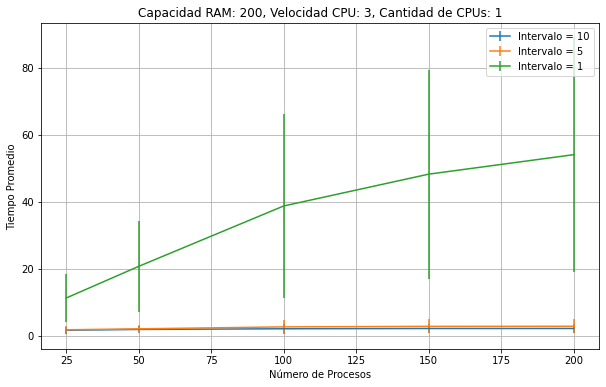

In [33]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

#Se definen las constantes del sistema
SEMILLA_ALEATORIA = 42
NUM_PROCESOS = [25, 50, 100, 150, 200]
INTERVALOS = [10, 5, 1]
CAPACIDAD_RAM = 200  
velocidad_cpu = 3

class Simulacion:
    #Se inicializa la clase con su constructor utilizando las variables necesarias para caracterizar la simulacion
    #env, ambiente de simulacion de SimPY
    #num_procesos, cantidad de procesos a simular
    #intervalo, tiempo esperado para la llegada de cada proceso
    #capacidad_ram, maximo espacio de almacenamiento en la RAM
    #velocidad_ram, cantidad de operaciones por ejecucion
    #tiempos_proceso, almacena el tiempo de ejecucion para cada proceso para luego poder sacar la media y desviacion estandar
    def __init__(self, env, num_procesos, intervalo, capacidad_ram, velocidad_cpu):
        self.env = env
        self.RAM = simpy.Container(env, init=capacidad_ram, capacity=capacidad_ram)
        self.CPU = simpy.Resource(env, capacity=1)
        self.num_procesos = num_procesos
        self.intervalo = intervalo
        self.velocidad_cpu = velocidad_cpu
        self.tiempos_proceso = []
        
    #Metodo que simula el comportamiento de un proceso. Al correr el metodo se generan procesos con requerimientos
    #aleatorios. Dentro de esta funcion se incluye el 
    def proceso(self, nombre):
        #Etapa de ciclo: new, se genera el proceso
        memoria_requerida = random.randint(1, 10)  # Requerimiento de memoria aleatorio para cada proceso
        
        with self.RAM.get(memoria_requerida) as req:
            #Etapa de ciclo: ready
            yield req
            tiempo_inicio = self.env.now
            instrucciones_restantes = random.randint(1, 10)  # Instrucciones aleatorias para cada proceso
            while instrucciones_restantes > 0:
                
                with self.CPU.request() as req:
                    #Etapa de Proceso: waiting
                    yield req
                    yield self.env.timeout(1 / self.velocidad_cpu)  # Tiempo necesario para ejecutar una instrucción
                    #Etapa de proceso: running se ejecuta instruccion
                    instrucciones_restantes -= 1
                    
            #Se apendiza al atributo tiempos_proceso el tiempo que tardo en ejecutarse la instancia del proceso        
            self.tiempos_proceso.append(self.env.now - tiempo_inicio) 
            yield self.RAM.put(memoria_requerida)
    
    #Esta funcion lleva el control de la generacion de procesos, por lo que se regula a partir del intervalo
    #con el que llegan estos.
    def ejecutar(self):
        for i in range(self.num_procesos):
            self.env.process(self.proceso(f'Proceso {i}'))
            yield self.env.timeout(random.expovariate(1.0 / self.intervalo))

#Funcion para ejecutar la simulacion, genera una instancia de esta con las constantes previamente definidas
# Return: retorna la media y desviacion estandar para los tiempos de ejecucion
def ejecutar_simulacion(num_procesos, intervalo, capacidad_ram, velocidad_cpu):
    random.seed(SEMILLA_ALEATORIA)
    env = simpy.Environment()
    sim = Simulacion(env, num_procesos, intervalo, capacidad_ram, velocidad_cpu)
    env.process(sim.ejecutar())
    env.run()

    return np.mean(sim.tiempos_proceso), np.std(sim.tiempos_proceso)

#se instancian las listas para guardar los datos a graficar
tiempos_promedio = []
desviaciones_estandar = []

#Se ejecutan tantas simulaciones como intervalos se quieren analizar y se apendizan los resultados a las listas para grafica
for intervalo in INTERVALOS:
    tiempos_promedio_intervalo = []
    desviaciones_estandar_intervalo = []
    for num_procesos in NUM_PROCESOS:
        tiempo_promedio, desviacion_estandar = ejecutar_simulacion(num_procesos, intervalo, CAPACIDAD_RAM, velocidad_cpu)
        tiempos_promedio_intervalo.append(tiempo_promedio)
        desviaciones_estandar_intervalo.append(desviacion_estandar)
    tiempos_promedio.append(tiempos_promedio_intervalo)
    desviaciones_estandar.append(desviaciones_estandar_intervalo)

# Se grafican los resultados
plt.figure(figsize=(10, 6))
for i, intervalo in enumerate(INTERVALOS):
    plt.errorbar(NUM_PROCESOS, tiempos_promedio[i], yerr=desviaciones_estandar[i], label=f'Intervalo = {intervalo}')
plt.xlabel('Número de Procesos')
plt.ylabel('Tiempo Promedio')
plt.title('Capacidad RAM: 200, Velocidad CPU: 3, Cantidad de CPUs: 1')
plt.legend()
plt.grid(True)
plt.show()



## Simulación 1:
<ul>
<li>RAM: 100</li>
<li>Velocidad CPU: 6</li>
<li>Cantidad de CPUs: 1</li>
</ul>

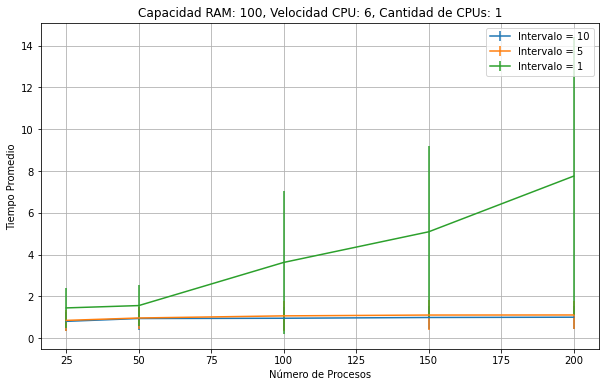

In [42]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

#Se definen las constantes del sistema
SEMILLA_ALEATORIA = 42
NUM_PROCESOS = [25, 50, 100, 150, 200]
INTERVALOS = [10, 5, 1]
CAPACIDAD_RAM = 100  
velocidad_cpu = 6

class Simulacion:
    #Se inicializa la clase con su constructor utilizando las variables necesarias para caracterizar la simulacion
    #env, ambiente de simulacion de SimPY
    #num_procesos, cantidad de procesos a simular
    #intervalo, tiempo esperado para la llegada de cada proceso
    #capacidad_ram, maximo espacio de almacenamiento en la RAM
    #velocidad_ram, cantidad de operaciones por ejecucion
    #tiempos_proceso, almacena el tiempo de ejecucion para cada proceso para luego poder sacar la media y desviacion estandar
    def __init__(self, env, num_procesos, intervalo, capacidad_ram, velocidad_cpu):
        self.env = env
        self.RAM = simpy.Container(env, init=capacidad_ram, capacity=capacidad_ram)
        self.CPU = simpy.Resource(env, capacity=1)
        self.num_procesos = num_procesos
        self.intervalo = intervalo
        self.velocidad_cpu = velocidad_cpu
        self.tiempos_proceso = []
        
    #Metodo que simula el comportamiento de un proceso. Al correr el metodo se generan procesos con requerimientos
    #aleatorios. Dentro de esta funcion se incluye el 
    def proceso(self, nombre):
        #Etapa de ciclo: new, se genera el proceso
        memoria_requerida = random.randint(1, 10)  # Requerimiento de memoria aleatorio para cada proceso
        
        with self.RAM.get(memoria_requerida) as req:
            #Etapa de ciclo: ready
            yield req
            tiempo_inicio = self.env.now
            instrucciones_restantes = random.randint(1, 10)  # Instrucciones aleatorias para cada proceso
            while instrucciones_restantes > 0:
                
                with self.CPU.request() as req:
                    #Etapa de Proceso: waiting
                    yield req
                    yield self.env.timeout(1 / self.velocidad_cpu)  # Tiempo necesario para ejecutar una instrucción
                    #Etapa de proceso: running se ejecuta instruccion
                    instrucciones_restantes -= 1
                    
            #Se apendiza al atributo tiempos_proceso el tiempo que tardo en ejecutarse la instancia del proceso        
            self.tiempos_proceso.append(self.env.now - tiempo_inicio) 
            yield self.RAM.put(memoria_requerida)
    
    #Esta funcion lleva el control de la generacion de procesos, por lo que se regula a partir del intervalo
    #con el que llegan estos.
    def ejecutar(self):
        for i in range(self.num_procesos):
            self.env.process(self.proceso(f'Proceso {i}'))
            yield self.env.timeout(random.expovariate(1.0 / self.intervalo))

#Funcion para ejecutar la simulacion, genera una instancia de esta con las constantes previamente definidas
# Return: retorna la media y desviacion estandar para los tiempos de ejecucion
def ejecutar_simulacion(num_procesos, intervalo, capacidad_ram, velocidad_cpu):
    random.seed(SEMILLA_ALEATORIA)
    env = simpy.Environment()
    sim = Simulacion(env, num_procesos, intervalo, capacidad_ram, velocidad_cpu)
    env.process(sim.ejecutar())
    env.run()

    return np.mean(sim.tiempos_proceso), np.std(sim.tiempos_proceso)

#se instancian las listas para guardar los datos a graficar
tiempos_promedio = []
desviaciones_estandar = []

#Se ejecutan tantas simulaciones como intervalos se quieren analizar y se apendizan los resultados a las listas para grafica
for intervalo in INTERVALOS:
    tiempos_promedio_intervalo = []
    desviaciones_estandar_intervalo = []
    for num_procesos in NUM_PROCESOS:
        tiempo_promedio, desviacion_estandar = ejecutar_simulacion(num_procesos, intervalo, CAPACIDAD_RAM, velocidad_cpu)
        tiempos_promedio_intervalo.append(tiempo_promedio)
        desviaciones_estandar_intervalo.append(desviacion_estandar)
    tiempos_promedio.append(tiempos_promedio_intervalo)
    desviaciones_estandar.append(desviaciones_estandar_intervalo)

# Se grafican los resultados
plt.figure(figsize=(10, 6))
for i, intervalo in enumerate(INTERVALOS):
    plt.errorbar(NUM_PROCESOS, tiempos_promedio[i], yerr=desviaciones_estandar[i], label=f'Intervalo = {intervalo}')
plt.xlabel('Número de Procesos')
plt.ylabel('Tiempo Promedio')
plt.title('Capacidad RAM: 100, Velocidad CPU: 6, Cantidad de CPUs: 1')
plt.legend()
plt.grid(True)
plt.show()



## Simulación 1:
<ul>
<li>RAM: 100</li>
<li>Velocidad CPU: 3</li>
<li>Cantidad de CPUs: 2</li>
</ul>

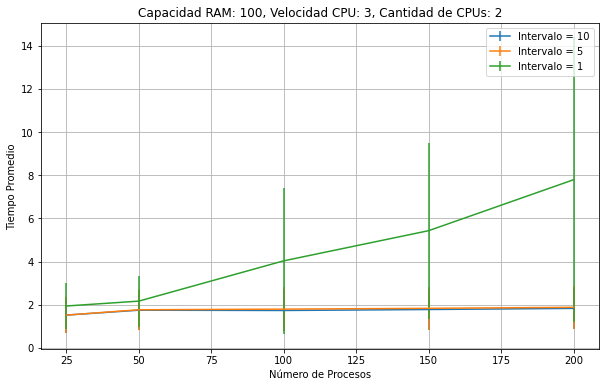

In [43]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt

#Se definen las constantes del sistema
SEMILLA_ALEATORIA = 42
NUM_PROCESOS = [25, 50, 100, 150, 200]
INTERVALOS = [10, 5, 1]
CAPACIDAD_RAM = 100  
velocidad_cpu = 3

class Simulacion:
    #Se inicializa la clase con su constructor utilizando las variables necesarias para caracterizar la simulacion
    #env, ambiente de simulacion de SimPY
    #num_procesos, cantidad de procesos a simular
    #intervalo, tiempo esperado para la llegada de cada proceso
    #capacidad_ram, maximo espacio de almacenamiento en la RAM
    #velocidad_ram, cantidad de operaciones por ejecucion
    #tiempos_proceso, almacena el tiempo de ejecucion para cada proceso para luego poder sacar la media y desviacion estandar
    def __init__(self, env, num_procesos, intervalo, capacidad_ram, velocidad_cpu):
        self.env = env
        self.RAM = simpy.Container(env, init=capacidad_ram, capacity=capacidad_ram)
        self.CPU = simpy.Resource(env, capacity=2)
        self.num_procesos = num_procesos
        self.intervalo = intervalo
        self.velocidad_cpu = velocidad_cpu
        self.tiempos_proceso = []
        
    #Metodo que simula el comportamiento de un proceso. Al correr el metodo se generan procesos con requerimientos
    #aleatorios. Dentro de esta funcion se incluye el 
    def proceso(self, nombre):
        #Etapa de ciclo: new, se genera el proceso
        memoria_requerida = random.randint(1, 10)  # Requerimiento de memoria aleatorio para cada proceso
        
        with self.RAM.get(memoria_requerida) as req:
            #Etapa de ciclo: ready
            yield req
            tiempo_inicio = self.env.now
            instrucciones_restantes = random.randint(1, 10)  # Instrucciones aleatorias para cada proceso
            while instrucciones_restantes > 0:
                
                with self.CPU.request() as req:
                    #Etapa de Proceso: waiting
                    yield req
                    yield self.env.timeout(1 / self.velocidad_cpu)  # Tiempo necesario para ejecutar una instrucción
                    #Etapa de proceso: running se ejecuta instruccion
                    instrucciones_restantes -= 1
                    
            #Se apendiza al atributo tiempos_proceso el tiempo que tardo en ejecutarse la instancia del proceso        
            self.tiempos_proceso.append(self.env.now - tiempo_inicio) 
            yield self.RAM.put(memoria_requerida)
    
    #Esta funcion lleva el control de la generacion de procesos, por lo que se regula a partir del intervalo
    #con el que llegan estos.
    def ejecutar(self):
        for i in range(self.num_procesos):
            self.env.process(self.proceso(f'Proceso {i}'))
            yield self.env.timeout(random.expovariate(1.0 / self.intervalo))

#Funcion para ejecutar la simulacion, genera una instancia de esta con las constantes previamente definidas
# Return: retorna la media y desviacion estandar para los tiempos de ejecucion
def ejecutar_simulacion(num_procesos, intervalo, capacidad_ram, velocidad_cpu):
    random.seed(SEMILLA_ALEATORIA)
    env = simpy.Environment()
    sim = Simulacion(env, num_procesos, intervalo, capacidad_ram, velocidad_cpu)
    env.process(sim.ejecutar())
    env.run()

    return np.mean(sim.tiempos_proceso), np.std(sim.tiempos_proceso)

#se instancian las listas para guardar los datos a graficar
tiempos_promedio = []
desviaciones_estandar = []

#Se ejecutan tantas simulaciones como intervalos se quieren analizar y se apendizan los resultados a las listas para grafica
for intervalo in INTERVALOS:
    tiempos_promedio_intervalo = []
    desviaciones_estandar_intervalo = []
    for num_procesos in NUM_PROCESOS:
        tiempo_promedio, desviacion_estandar = ejecutar_simulacion(num_procesos, intervalo, CAPACIDAD_RAM, velocidad_cpu)
        tiempos_promedio_intervalo.append(tiempo_promedio)
        desviaciones_estandar_intervalo.append(desviacion_estandar)
    tiempos_promedio.append(tiempos_promedio_intervalo)
    desviaciones_estandar.append(desviaciones_estandar_intervalo)

# Se grafican los resultados
plt.figure(figsize=(10, 6))
for i, intervalo in enumerate(INTERVALOS):
    plt.errorbar(NUM_PROCESOS, tiempos_promedio[i], yerr=desviaciones_estandar[i], label=f'Intervalo = {intervalo}')
plt.xlabel('Número de Procesos')
plt.ylabel('Tiempo Promedio')
plt.title('Capacidad RAM: 100, Velocidad CPU: 3, Cantidad de CPUs: 2')
plt.legend()
plt.grid(True)
plt.show()
